<a href="https://colab.research.google.com/github/psssnikhil/DeepLearning-with-pytorch/blob/master/Logistic_regression_MNIST_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploring the Data

In [0]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [0]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [122]:
len(dataset)

60000

In [123]:

test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [124]:
dataset[1]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F860CD2CC88>, 0)

Label: 0


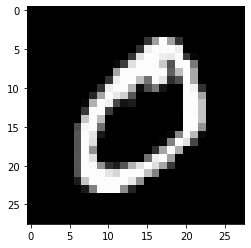

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
image, label = dataset[1]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


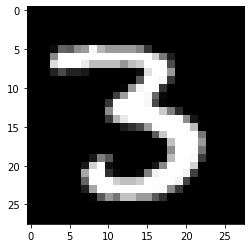

In [126]:
image, label = dataset[12]
plt.imshow(image, cmap='gray')
print('Label:', label)

Let us now convert them to tensor because we work with tensors in pytorch.


In [0]:
#Here we use transforms which helps us in converting the images to tensors.

import torchvision.transforms as transforms

In [0]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [129]:
img_tensor, label = dataset[1]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 0


In [130]:
print(img_tensor[:,10:14,9:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.1882, 0.9333, 0.9882, 0.9882, 0.7020, 0.0471],
         [0.6471, 0.9922, 0.9137, 0.8157, 0.3294, 0.0000],
         [0.9882, 0.9412, 0.2784, 0.0745, 0.1098, 0.0000],
         [0.9882, 0.2471, 0.0000, 0.0000, 0.0000, 0.0000]]])
tensor(1.) tensor(0.)


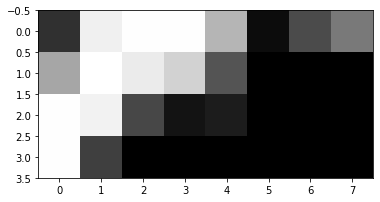

In [131]:
# Plot the image by passing in the 28x28 matrix and we can see as it is grayscale we can get the specific values of pixels

plt.imshow(img_tensor[0,10:14,9:17], cmap='gray');

#cmap gray indicates it is a grayscale image

In [0]:
import numpy as np

def split_validation(n, fraction):
    # Determine size of validation set
    val_num = int(fraction*n)
    idxs = np.random.permutation(n)
    print(val_num)
    print(idxs)
    return idxs[val_num:], idxs[:val_num]

In [133]:
train_indices, val_indices = split_validation(len(dataset), fraction=0.2)

12000
[15399 49814 26793 ... 31185 30927 32956]


if you can observe the 12000 images are taken ie 20 percent out of 60000 and also the incides are taken at random to ensure all the digits in the MNIST dataset are availabe for validation set



In [134]:
print(len(train_indices), len(val_indices))
print('Sample val indices: ', val_indices[:20])

48000 12000
Sample val indices:  [15399 49814 26793 31112 41886 10494 28074  4522  5839 15309 54260 47072
 23170 30433 52979 32235 36542 42412 27436 18446]


In [0]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [0]:
batch_size=100

'''
batch size can be tuned as per the need. 
'''

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, 
                          batch_size, 
                          sampler=train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                        batch_size, 
                        sampler=val_sampler)

In [0]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [140]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0102, -0.0326,  0.0161,  ...,  0.0339, -0.0081, -0.0230],
        [ 0.0314,  0.0155, -0.0006,  ...,  0.0163, -0.0064, -0.0029],
        [ 0.0043,  0.0133,  0.0038,  ..., -0.0036, -0.0301, -0.0054],
        ...,
        [-0.0038,  0.0311,  0.0074,  ...,  0.0093, -0.0271, -0.0070],
        [-0.0028,  0.0034, -0.0171,  ..., -0.0106, -0.0162,  0.0236],
        [-0.0194, -0.0083,  0.0029,  ..., -0.0219, -0.0125,  0.0065]],
       requires_grad=True)

In [141]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0166, -0.0166,  0.0050, -0.0127, -0.0050,  0.0183,  0.0346,  0.0230,
        -0.0124,  0.0300], requires_grad=True)

Here we reshape the tensor because the dimesions are 1 * 28 * 
28 now they are to be flattened for which we use reshape as shown

In [0]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = Model()

In [143]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0221,  0.0007, -0.0158,  ...,  0.0224,  0.0174, -0.0132],
         [-0.0351,  0.0074,  0.0316,  ...,  0.0253,  0.0219,  0.0139],
         [-0.0251,  0.0236, -0.0190,  ..., -0.0017,  0.0263,  0.0181],
         ...,
         [ 0.0197,  0.0234,  0.0346,  ...,  0.0019, -0.0139,  0.0033],
         [-0.0140, -0.0284, -0.0195,  ..., -0.0184,  0.0064,  0.0037],
         [ 0.0243,  0.0128,  0.0327,  ...,  0.0286, -0.0226, -0.0247]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0210, -0.0297,  0.0123, -0.0192,  0.0021,  0.0242,  0.0102, -0.0112,
          0.0241,  0.0042], requires_grad=True)]

In [148]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:5].data)

outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[-0.0257, -0.0937,  0.1387, -0.4279,  0.3868, -0.1645, -0.0432,  0.2335,
         -0.1849, -0.0913],
        [-0.1083, -0.3000, -0.1067,  0.0302, -0.0412, -0.0492,  0.0525,  0.0392,
          0.3394,  0.0675],
        [-0.1620, -0.4970,  0.1444, -0.3530,  0.0570, -0.1881, -0.2915,  0.1257,
          0.0782, -0.0394],
        [-0.1877, -0.3296,  0.2623, -0.1972, -0.1002, -0.2365, -0.2917,  0.1328,
         -0.1088,  0.1051],
        [-0.0241, -0.2433,  0.2633, -0.1702, -0.1804, -0.2394, -0.0915, -0.0183,
          0.2171,  0.1386]])


In [0]:
import torch.nn.functional as F

In [150]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)
print(probs[:5])

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

tensor([[0.0977, 0.0913, 0.1152, 0.0654, 0.1477, 0.0851, 0.0960, 0.1267, 0.0834,
         0.0915],
        [0.0893, 0.0737, 0.0895, 0.1026, 0.0955, 0.0948, 0.1049, 0.1035, 0.1398,
         0.1065],
        [0.0932, 0.0667, 0.1266, 0.0770, 0.1160, 0.0908, 0.0819, 0.1242, 0.1185,
         0.1053],
        [0.0895, 0.0777, 0.1404, 0.0887, 0.0977, 0.0853, 0.0807, 0.1233, 0.0969,
         0.1200],
        [0.0995, 0.0799, 0.1326, 0.0860, 0.0851, 0.0802, 0.0930, 0.1001, 0.1266,
         0.1171]], grad_fn=<SliceBackward>)
Sample probabilities:
 tensor([[0.0977, 0.0913, 0.1152, 0.0654, 0.1477, 0.0851, 0.0960, 0.1267, 0.0834,
         0.0915],
        [0.0893, 0.0737, 0.0895, 0.1026, 0.0955, 0.0948, 0.1049, 0.1035, 0.1398,
         0.1065]])
Sum:  1.0


In [151]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 8, 2, 2, 2, 9, 7, 2, 2, 7, 7, 2, 0, 2, 7, 2, 9, 5, 7, 2, 2, 7, 2, 2,
        2, 7, 2, 2, 2, 2, 0, 2, 5, 2, 2, 2, 2, 2, 9, 7, 5, 9, 3, 7, 2, 2, 9, 9,
        7, 2, 2, 2, 2, 9, 2, 0, 2, 2, 2, 3, 8, 2, 7, 9, 8, 2, 2, 7, 5, 4, 9, 2,
        2, 7, 7, 7, 8, 5, 2, 2, 2, 2, 0, 7, 4, 2, 2, 2, 2, 5, 2, 7, 5, 8, 2, 2,
        7, 9, 7, 9])
tensor([0.1477, 0.1398, 0.1266, 0.1404, 0.1326, 0.1491, 0.1460, 0.1202, 0.2012,
        0.1177, 0.1212, 0.1274, 0.1106, 0.1405, 0.1322, 0.1256, 0.1258, 0.1159,
        0.1370, 0.1369, 0.1298, 0.1332, 0.1106, 0.1674, 0.1307, 0.1202, 0.1267,
        0.1330, 0.1287, 0.1420, 0.1206, 0.1520, 0.1281, 0.1468, 0.1249, 0.1376,
        0.1284, 0.1306, 0.1228, 0.1180, 0.1174, 0.1252, 0.1150, 0.1162, 0.1305,
        0.1580, 0.1388, 0.1302, 0.1285, 0.1487, 0.1462, 0.1425, 0.1129, 0.1255,
        0.1443, 0.1155, 0.1332, 0.1230, 0.1500, 0.1156, 0.1228, 0.1171, 0.1238,
        0.1515, 0.1217, 0.1315, 0.1281, 0.1314, 0.1215, 0.1732, 0.1272, 0.1396,
        0.1406, 0.1

In [152]:

#Original Labels
labels

tensor([5, 7, 7, 9, 2, 0, 8, 7, 5, 2, 9, 9, 1, 3, 5, 9, 5, 6, 2, 8, 0, 8, 9, 5,
        8, 9, 7, 2, 0, 8, 9, 8, 5, 0, 8, 3, 0, 1, 6, 2, 6, 3, 1, 6, 3, 4, 0, 6,
        6, 7, 4, 4, 2, 8, 5, 2, 9, 2, 4, 1, 8, 3, 3, 0, 5, 1, 3, 4, 5, 0, 6, 7,
        1, 7, 7, 7, 9, 6, 9, 5, 0, 4, 7, 4, 8, 2, 8, 8, 1, 9, 6, 7, 2, 9, 3, 2,
        6, 3, 9, 3])

## Evaluation Metric and Loss Function

In [0]:
#defining basic accuracy funtion ie no of labels matched by total no of labels

def accuracy(l1, l2):
    return torch.sum(l1 == l2).item() / len(l1)

In [155]:
accuracy(preds, labels)

0.13

In [0]:
loss_fn = F.cross_entropy

In [157]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3179, grad_fn=<NllLossBackward>)


In [0]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [0]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    # Calculate loss
    preds = model(xb)
    loss = loss_func(preds, yb)
                     
    if opt is not None:
        # Compute gradients
        loss.backward()
        # Update parameters             
        opt.step()
        # Reset gradients
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        # Compute the metric
        metric_result = metric(preds, yb)
    
    return loss.item(), len(xb), metric_result

In [0]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # Pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                   for xb,yb in valid_dl]
        # Separate losses, counts and metrics
        losses, nums, metrics = zip(*results)
        # Total size of the dataset
        total = np.sum(nums)
        # Avg. loss across batches 
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            # Avg. of metric across batches
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

In [0]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [165]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3042, Accuracy: 0.0922


In [0]:
#just like we have seen in linear regression the same fit function we r using here.


def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        # Training
        for xb,yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)

        # Evaluation
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        # Print progress
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
                  .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

In [0]:
# Redifine model and optimizer
model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [168]:
fit(6, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/6], Loss: 1.8859, accuracy: 0.6750
Epoch [2/6], Loss: 1.5820, accuracy: 0.7546
Epoch [3/6], Loss: 1.3686, accuracy: 0.7842
Epoch [4/6], Loss: 1.2154, accuracy: 0.8019
Epoch [5/6], Loss: 1.1021, accuracy: 0.8156
Epoch [6/6], Loss: 1.0156, accuracy: 0.8219


In [169]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.9475, accuracy: 0.8284
Epoch [2/5], Loss: 0.8926, accuracy: 0.8325
Epoch [3/5], Loss: 0.8474, accuracy: 0.8367
Epoch [4/5], Loss: 0.8095, accuracy: 0.8411
Epoch [5/5], Loss: 0.7773, accuracy: 0.8448


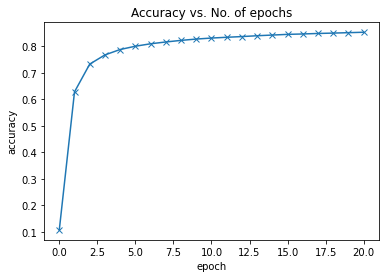

In [50]:
#plot the above accuracies 
#take ur accuracies here
#accuracies=[]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

## Testing with individual images

In [0]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


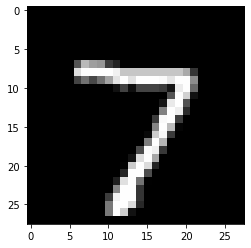

In [106]:
img, label = test_dataset[1]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [107]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [0]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


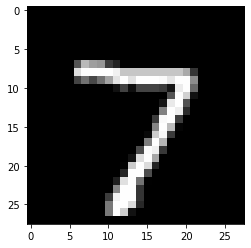

In [109]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


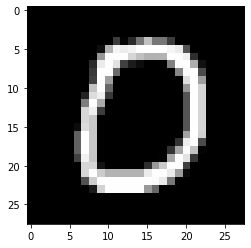

In [110]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 7


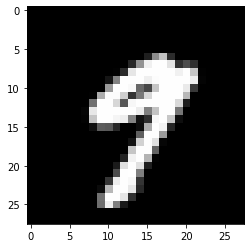

In [112]:
img, label = test_dataset[20]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 6 , Predicted: 6


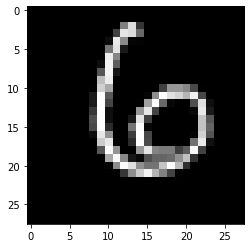

In [113]:
img, label = test_dataset[100]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [115]:
test_loader = DataLoader(test_dataset, batch_size=300)

test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 1.0784, Accuracy: 0.8196


## Saving and loading the model

In [0]:
#this saves all the models weights and biases.

torch.save(model.state_dict(), 'mnist-logistic.pth')

In [171]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0270,  0.0025, -0.0136,  ...,  0.0286, -0.0357,  0.0206],
                      [ 0.0262,  0.0283,  0.0099,  ...,  0.0100, -0.0238, -0.0273],
                      [ 0.0051, -0.0330, -0.0069,  ...,  0.0138,  0.0285,  0.0137],
                      ...,
                      [ 0.0065,  0.0229, -0.0017,  ..., -0.0130,  0.0287,  0.0130],
                      [ 0.0200,  0.0293,  0.0225,  ..., -0.0310, -0.0332,  0.0232],
                      [ 0.0078, -0.0054,  0.0171,  ..., -0.0162,  0.0213,  0.0045]])),
             ('linear.bias',
              tensor([-0.0497,  0.0760, -0.0433, -0.0513,  0.0157,  0.0388, -0.0006,  0.0165,
                      -0.0544, -0.0233]))])

To load the model weights, we can instante a new object of the class `Model`, and use the `.load_state_dict` method.

In [172]:
model2 = Model()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0270,  0.0025, -0.0136,  ...,  0.0286, -0.0357,  0.0206],
                      [ 0.0262,  0.0283,  0.0099,  ...,  0.0100, -0.0238, -0.0273],
                      [ 0.0051, -0.0330, -0.0069,  ...,  0.0138,  0.0285,  0.0137],
                      ...,
                      [ 0.0065,  0.0229, -0.0017,  ..., -0.0130,  0.0287,  0.0130],
                      [ 0.0200,  0.0293,  0.0225,  ..., -0.0310, -0.0332,  0.0232],
                      [ 0.0078, -0.0054,  0.0171,  ..., -0.0162,  0.0213,  0.0045]])),
             ('linear.bias',
              tensor([-0.0497,  0.0760, -0.0433, -0.0513,  0.0157,  0.0388, -0.0006,  0.0165,
                      -0.0544, -0.0233]))])

In [173]:
test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.7556, Accuracy: 0.8509


yes...Thats the same loss as above.so there you go sanity chck is also completed.

Kudos,We have completed learning of implementing logistic regression too using mnist dataset.